# **Predicting the coordinates of the pixel which has a value of 255 in a 50x50 grayscale image where all other pixels have a value 0.**

**Supervised Regression using CNN.**

# Importing the necessary libraries.

In [2]:
# Importing the required libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Generating a synthetic dataset with 50,000 images.

**Since the total number of possible sets of coordinates with a hot value is 2500(50x50), a relatively large dataset would be required for training and validation purposes.**

In [3]:
#Defining the image size and the number of images that are to be generated.
IMAGE_SIZE = 50
NUM_IMAGES = 50000

#Generating the dataset.
def generate_data(num_images, image_size):

    #X: An array to store the pixel values of 50,000 grayscale images.
    X = np.zeros((num_images, image_size, image_size, 1), dtype=np.float32)
    #An array to store the coordinates of the hot pixel for each image.
    y = np.zeros((num_images, 2), dtype=np.float32)

    #Iterating through each image in the dataset.
    for i in range(num_images):
        #Randomly choosing an x-coordinate and a y-coordinate. 
        x_coord = np.random.randint(0, image_size)
        y_coord = np.random.randint(0, image_size)
        #Assigning the value of 255 to the randomly chosen coordinates.
        X[i, x_coord, y_coord, 0] = 255
        #Assigning the value of the coordinates with the hot pixel.
        y[i] = [x_coord, y_coord]
    return X, y 

X, y = generate_data(NUM_IMAGES, IMAGE_SIZE)



# Splitting the dataset: 
**Splitting the dataset into the training and the validation sets, with 40,000 images in the training set and 10,000 images in the validation set.**


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Printing the shapes of the datasets.
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (40000, 50, 50, 1), y_train shape: (40000, 2)
X_val shape: (10000, 50, 50, 1), y_val shape: (10000, 2)


# Model Compilation:

**The model consists of three convolutional layers with ReLU activation functions, followed by a Flatten layer to reshape the output. A single fully connected layer with ReLU activation is added, and the final layer predicts the x and y coordinates of the hot pixel.**

**The 'Adam optimizer' with a learning rate of '0.01' has been used for training, and the model has been compiled with 'mean squared error loss'.**

_(Since this is a **regression task**, the **'MaxPooling'** and the **'BatchNormalization'** layers have been avoided in the model architecture and **'mean squared error'** has been used as the  loss function.)_

In [5]:
def create_model(input):
  model = Sequential([
    Conv2D(32,(3),strides=(1),padding='same',activation='relu',input_shape=input),
    Conv2D(64,(3),strides=(1),padding='same',activation='relu'),
    Conv2D(64,(3),strides=(1),padding='same',activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2),
    ])

  #Defining Adam optimizer with a learning rate of 0.01.
  optimizer= Adam(learning_rate=0.01)
  model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
  return model

#Defining the variable 'image_shape' with a size of '50x50x1' and passing it to the model. '1' signifies that there is just one channel.
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)
model = create_model(input_shape)

# Model summary
model.summary()

C:\Users\shrey\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    10,240,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,295,938 (39.28 MB)

 Trainable params: 10,295,938 (39.28 MB)

 Non-trainable params: 0 (0.00 B)

# The Training Process:

**The number of epochs and the batch size have been set to 10 and 256 respectively, to strike a balance between the model accuracy, the model generalization and the training process time.**

_(Training it for a greater number of epochs than 10 does not appear necessary with this model architecture as the model seems to have converged. There does not appear any significant improvement in the accuracies in continuing further.)_

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9846 - loss: 0.6268 - val_accuracy: 0.9858 - val_loss: 0.3390
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9862 - loss: 0.2152 - val_accuracy: 0.9919 - val_loss: 0.0081
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9895 - loss: 0.0061 - val_accuracy: 0.9929 - val_loss: 5.5877e-04
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9912 - loss: 4.9356e-04 - val_accuracy: 0.9902 - val_loss: 2.5271e-04
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9899 - loss: 2.8253e-04 - val_accuracy: 0.9911 - val_loss: 4.3167e-04
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9903 - loss: 0.0013 - val_accuracy: 0.9938 - val_loss: 0.0147
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9901 - loss: 1.3535 - val_accuracy: 0.9899 - val_loss: 7.2469
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9893 - los

# Accuracies obtained after the training process:

**A training accuracy of '98.96%' and a validation accuracy of '99.17%' have been obtained after 10 epochs. Training it for any more number of epochs does not appear necessary since there are no signs of any significant improvements in the accuracies after continuing further. The model seems to have converged after 10 epochs without overfitting.**

_(The proximity in the values of both the accuracies indicates that the model has not overfit on the training dataset and that it would perform well on the new data.)_

# Visualising the Training Process.

**This section displays the training progress of the model through a plot. The plot illustrates the training and the testing accuracies of the model over epochs. This visualization provides an insight into the performance and the convergence of the model over time.**



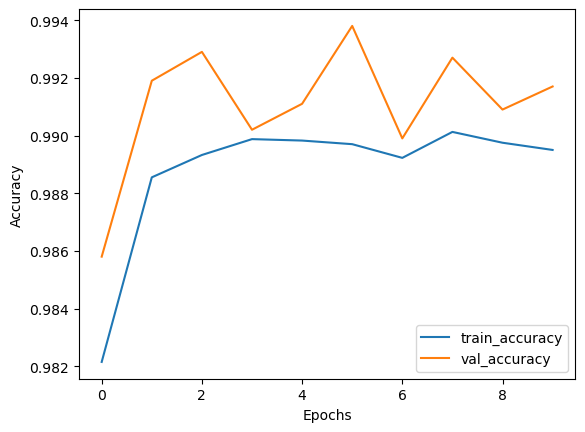

In [8]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Prediction Evaluation:

**In the following section, 10 examples from the validation dataset have been randomly selected and passed to the model. The actual and the predicted coordinates for each case have been printed and compared through visualisation. The 'Blue dot' represents the 'predicted value' and the 'red dot' represents the 'actual values'.**

_(The near overlapping of the **blue dot** and the **red dot** in each of the 10 cases showcases that the model has been very accurate in making predictions.)_

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
Example 1:
Actual Coordinates: [ 4. 39.]
Predicted Coordinates: [ 4.000636 39.02951 ]




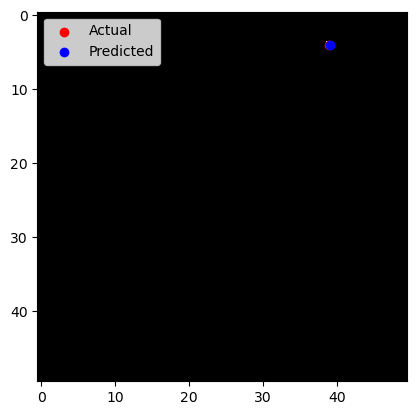

Example 2:
Actual Coordinates: [14.  7.]
Predicted Coordinates: [14.008751   7.0028462]




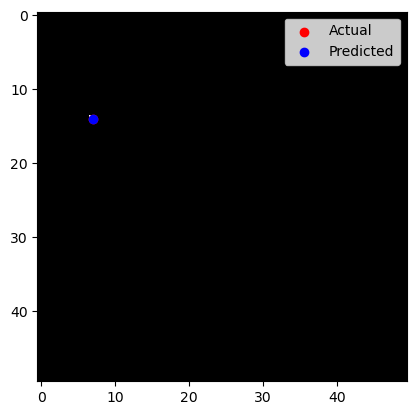

Example 3:
Actual Coordinates: [49.  2.]
Predicted Coordinates: [49.008053   1.9924829]




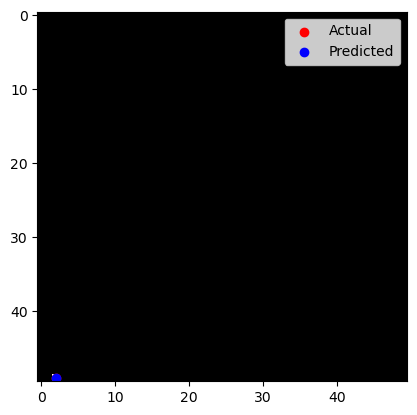

Example 4:
Actual Coordinates: [48. 33.]
Predicted Coordinates: [48.036266 33.021114]




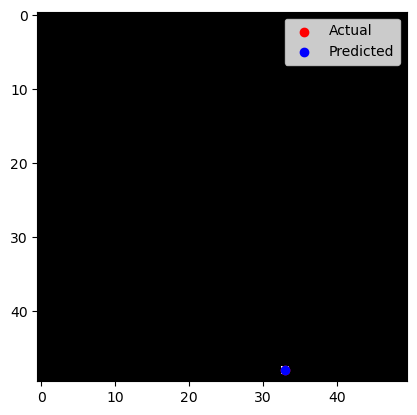

Example 5:
Actual Coordinates: [48. 11.]
Predicted Coordinates: [48.050236 11.016306]




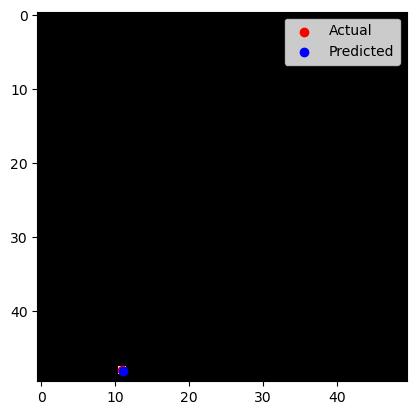

Example 6:
Actual Coordinates: [49. 49.]
Predicted Coordinates: [49.064865 49.06404 ]




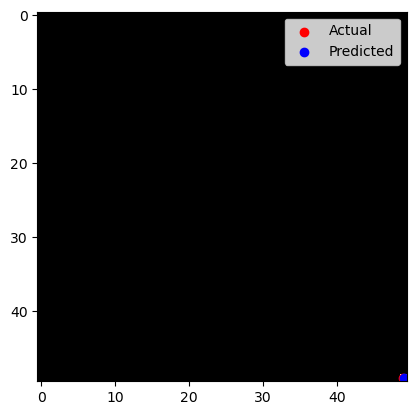

Example 7:
Actual Coordinates: [19. 39.]
Predicted Coordinates: [19.009695 39.01821 ]




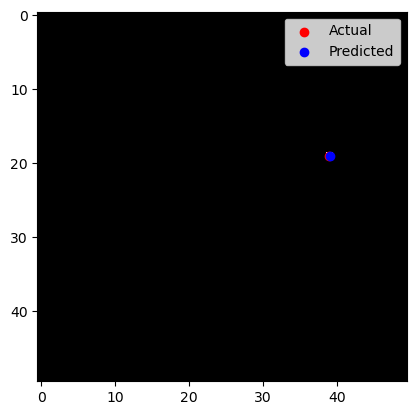

Example 8:
Actual Coordinates: [ 5. 25.]
Predicted Coordinates: [ 5.00213  25.005869]




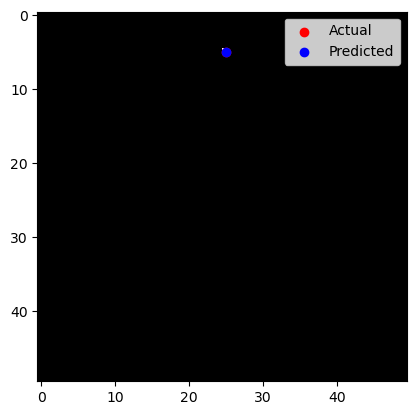

Example 9:
Actual Coordinates: [27. 18.]
Predicted Coordinates: [27.010717 18.002857]




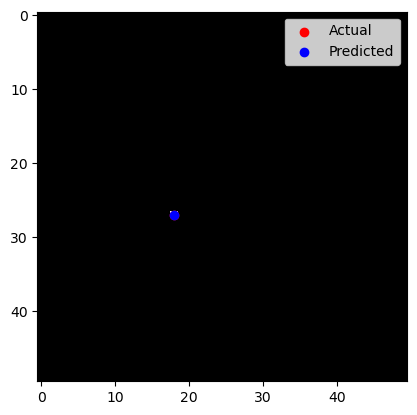

Example 10:
Actual Coordinates: [47. 37.]
Predicted Coordinates: [47.028404 37.024902]




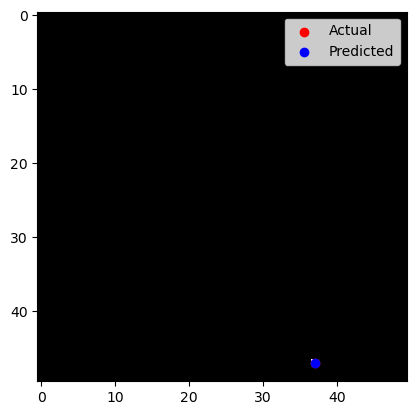

In [16]:
# Select 10 random examples from the validation set
num_samples = 10
random_indices = np.random.choice(X_val.shape[0], num_samples, replace=False)
X_sample = X_val[random_indices]
y_actual = y_val[random_indices]

# Predict the coordinates for the selected examples
y_predicted = model.predict(X_sample)

# Print actual and predicted coordinates
for i in range(num_samples):
    print(f"Example {i+1}:")
    print(f"Actual Coordinates: {y_actual[i]}")
    print(f"Predicted Coordinates: {y_predicted[i]}")
    print("\n")

    # Plot the image with actual and predicted coordinates
    plt.imshow(X_sample[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.scatter(y_actual[i][1], y_actual[i][0], color='red', label='Actual')
    plt.scatter(y_predicted[i][1], y_predicted[i][0], color='blue', label='Predicted')
    plt.legend()
    plt.show()